In [27]:
%matplotlib inline
import torch
from torch import nn
from torch.utils import data
from d2l import torch as d2l

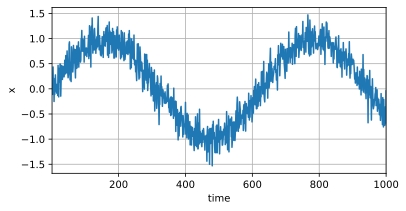

In [28]:
T = 1000
time  = torch.arange(1, T+1, dtype = torch.float32)
x = torch.sin(0.01*time) + torch.normal(0,0.2,(T,))

d2l.plot(time,[x], 'time', 'x', xlim = [1,1000], figsize=(6,3))

In [29]:
x1 = torch.normal(0,0.2,(T,))
x1
        

tensor([ 2.0893e-02,  6.1719e-02,  1.6229e-01, -8.9088e-02,  2.0510e-01,
         1.6020e-02, -3.1471e-01,  2.7111e-01, -2.1933e-01,  2.3584e-01,
         3.0232e-01, -3.7209e-01,  2.7247e-01, -2.7883e-01,  1.8069e-01,
         5.1562e-02,  3.6050e-01,  2.2526e-01, -3.3785e-01,  3.5924e-01,
        -4.2485e-01, -4.0122e-02, -1.3089e-01,  2.1664e-01,  2.6983e-01,
         1.4886e-01, -1.5173e-01,  8.6789e-02,  4.9440e-01, -9.4140e-02,
        -3.6139e-02,  2.9523e-02, -3.2110e-01,  4.6202e-01, -2.5801e-01,
        -4.2098e-01,  4.2822e-01,  2.4315e-01, -9.9082e-02, -2.6147e-01,
         3.4996e-01, -2.4458e-01, -2.6583e-01, -2.5273e-01, -1.9263e-01,
        -9.3300e-02, -1.2046e-01,  3.8627e-02, -1.3664e-01, -2.3904e-01,
        -2.2989e-01,  8.8096e-02, -1.1245e-01, -6.6413e-02,  6.0656e-02,
        -1.7283e-02, -2.2782e-01, -5.5293e-02, -1.5121e-02,  1.9922e-01,
        -2.2617e-02,  1.9497e-01,  1.5566e-01, -2.7727e-01,  1.1810e-01,
         1.5657e-01, -9.4535e-03,  3.3103e-01,  2.5

In [30]:
tau =4
feature = torch.zeros((T-tau, tau))
for i in range(tau):
    feature[:, i] = x[i: T-tau +i]
labels = x[tau:].reshape((-1,1))
labels

tensor([[-1.0401e-01],
        [ 2.0878e-01],
        [-2.5150e-01],
        [ 9.5764e-02],
        [-1.1109e-01],
        [ 3.4297e-02],
        [ 2.7647e-01],
        [ 9.8806e-02],
        [ 9.0612e-02],
        [-5.6686e-02],
        [-8.6188e-02],
        [ 8.9148e-02],
        [ 2.2227e-02],
        [-1.3309e-01],
        [ 4.6494e-01],
        [ 2.4426e-01],
        [-1.6002e-01],
        [ 4.0685e-01],
        [ 1.3086e-01],
        [ 2.5703e-01],
        [ 4.9419e-01],
        [ 4.9053e-01],
        [-1.4467e-01],
        [ 1.4639e-01],
        [ 4.1061e-01],
        [ 4.6161e-01],
        [ 3.7278e-01],
        [ 1.8616e-01],
        [ 2.7235e-01],
        [ 4.4701e-01],
        [ 2.4242e-01],
        [ 2.5837e-01],
        [ 2.3850e-01],
        [ 3.1514e-01],
        [ 5.6837e-01],
        [ 5.5657e-01],
        [ 2.9742e-01],
        [ 6.6141e-01],
        [ 3.6647e-01],
        [ 3.1789e-01],
        [ 4.3478e-01],
        [ 7.5257e-01],
        [ 5.3774e-01],
        [ 3

In [31]:
batch_size, n_train = 6, 600

train_iter = data.DataLoader(data.TensorDataset(feature[:n_train], labels[:n_train]), batch_size, shuffle = True)


In [32]:
batch, y= next(iter(train_iter))
batch, y

(tensor([[ 0.6731,  0.8552,  0.6551,  0.6952],
         [ 0.8322,  0.6537,  0.5281,  0.4025],
         [-0.7404, -0.6076, -0.9565, -0.5331],
         [-0.2352, -0.5622, -0.2645, -0.2725],
         [ 0.5281,  0.4705,  0.1445,  0.8349],
         [-0.3185, -0.1652, -0.2880, -0.6327]]),
 tensor([[ 0.8489],
         [ 0.3532],
         [-0.6566],
         [-0.1355],
         [ 0.7777],
         [-0.8452]]))

In [33]:
def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def get_net():
    net = nn.Sequential(nn.Linear(4,10),
                        nn.ReLU(),
                        nn.Linear(10,1)
                        )
    net.apply(init_weight)
    return net

loss = nn.MSELoss(reduction ='none')


In [34]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)

    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        print(f'epoch {epoch +1},' f'loss:{d2l.evaluate_loss(net, train_iter,loss):f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1,loss:0.059575
epoch 2,loss:0.055363
epoch 3,loss:0.054439
epoch 4,loss:0.052890
epoch 5,loss:0.054400


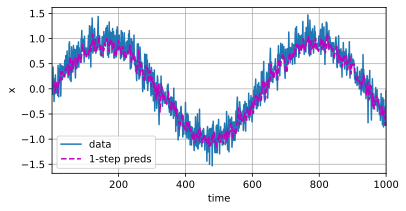

In [35]:
onestep_preds = net(feature)

d2l.plot([time, time[tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy()], 
         'time', 'x', legend=['data', '1-step preds'],
         xlim=[1, 1000], figsize=(6,3)
         
         )

In [36]:
multistep_preds = torch.zeros(T)
multistep_preds[:n_train+tau] = x[:n_train+tau]

for i in range(n_train+tau, T):
    multistep_preds[i] = net(multistep_preds[i - tau: i].reshape((1,-1)))

In [37]:
d2l.plot([time, time[tau:], time[n_train + tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy(),
          multistep_preds[n_train + tau:].detach().numpy()], 'time',
         'x', legend=['data', '1-step preds', 'multistep preds'],
         xlim=[1, 1000], figsize=(6, 3))

NameError: name 'multistep_preds' is not defined